In [0]:
from  datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
#FAANG

assets = ['FB','AMZN','AAPL','NFLX','GOOG' ]


In [0]:
weights = np.array([.2,.2,.2,.2,.2])

In [0]:
stockStartDate = '2013-01-01'

In [7]:
today = datetime.today().strftime('%y-%m-%d')
print (today)

20-04-25


In [8]:
df= pd.DataFrame()

for stock in assets:
  df[stock] = web.DataReader(stock, data_source='yahoo', start=stockStartDate, end=today) ['Adj Close']
print (df)

                    FB         AMZN        AAPL        NFLX         GOOG
Date                                                                    
2013-01-02   28.000000   257.309998   68.687538   13.144286   360.274597
2013-01-03   27.770000   258.480011   67.820526   13.798572   360.483826
2013-01-04   28.760000   259.149994   65.931404   13.711429   367.607117
2013-01-07   29.420000   268.459991   65.543602   14.171429   366.003143
2013-01-08   29.059999   266.380005   65.719994   13.880000   365.280823
...                ...          ...         ...         ...          ...
2020-04-20  178.240005  2393.610107  276.929993  437.489990  1266.609985
2020-04-21  170.800003  2328.120117  268.369995  433.829987  1216.339966
2020-04-22  182.279999  2363.489990  276.100006  421.420013  1263.209961
2020-04-23  185.130005  2399.449951  275.029999  426.700012  1276.310059
2020-04-24  190.070007  2410.219971  282.970001  424.989990  1279.310059

[1841 rows x 5 columns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


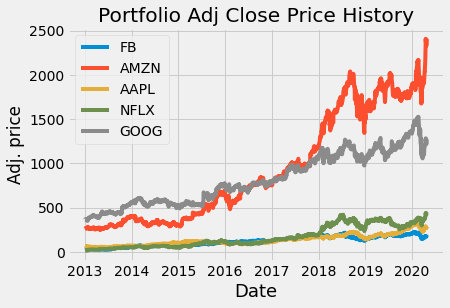

In [9]:
title = 'Portfolio Adj Close Price History'

my_stocks = df

for c in my_stocks.columns.values:
  plt.plot(my_stocks[c],label = c)
plt.title(title)
plt.xlabel("Date", fontsize=18)
plt.ylabel('Adj. price')
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [10]:
#show the daily simple returns

returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-04-20,-0.005579,0.007836,-0.020757,0.034353,-0.012967
2020-04-21,-0.041741,-0.027360,-0.030910,-0.008366,-0.039689
2020-04-22,0.067213,0.015192,0.028804,-0.028606,0.038534


In [11]:
# annualized covarience

cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.115589,0.051369,0.040186,0.053911,0.047735
AMZN,0.051369,0.091325,0.035223,0.060978,0.046161
AAPL,0.040186,0.035223,0.076645,0.031684,0.036816
NFLX,0.053911,0.060978,0.031684,0.214832,0.048701
GOOG,0.047735,0.046161,0.036816,0.048701,0.063990


In [12]:
#protfolio variance

port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.058716393998385255

In [13]:

#calculate volitility
volitilty = np.sqrt(port_variance)
volitilty


0.24231465906623406

In [14]:
#annual portfolio return
portSAR= np.sum(returns.mean() * weights) * 252
portSAR


0.3378371644805688

In [15]:
#expected anual return, volitity (risk) and varience 

percent_var = str(round(port_variance,2 ) *100) + "%"
percent_vols = str(round(volitilty, 2 ) *100) +"%"
percent_ret = str(round(portSAR, 2 ) *100) +"%"

print( "expected anual return: " + percent_ret)
print( "expected volitiltyt/risk: " + percent_vols)
print( "expected variance: " + percent_var)

expected anual return: 34.0%
expected volitiltyt/risk: 24.0%
expected variance: 6.0%


In [16]:
pip install pyportfolioOpt

In [0]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns



In [31]:
#portfolio Optimization !

# expected returns and annualized sample covariance matrix of assets returns

mu = expected_returns.mean_historical_return (df)
S= risk_models.sample_cov(df)


#optomize for maximal sharpe ratio

ef = EfficientFrontier(mu,S)
weights =ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)


{'FB': 0.13377, 'AMZN': 0.3334, 'AAPL': 0.17365, 'NFLX': 0.35918, 'GOOG': 0.0}
Expected annual return: 40.9%
Annual volatility: 27.7%
Sharpe Ratio: 1.41


(0.40876567811108094, 0.27660651147015475, 1.4054827416925357)

In [21]:
# check for 100% when combined the percentages

0.13377 + 0.3334 + 0.17365 + 0.35918

1.0

In [38]:
# # discrete allocation of each share per stock

# from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# latest_price = get_latest_prices
# weights = cleaned_weights
# da = DiscreteAllocation(weights, latest_price, total_portfolio_value=15000)

# allocation, leftover = da.lp_portfolio()

TypeError: ignored